In [1]:
%matplotlib widget
from ipywidgets import *
from astropy.io import fits
import astropy.time as time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cv2 as cv
import imutils
from scipy import ndimage

# Open the fits cube and lightcurve data

## Fits cube

In [2]:
cube = fits.open('Data/Corrected_Data/CH_PR149000_TG008901_TU2024-01-13T03-18-13_SCI_COR_SubArray_V0300.fits')
cube.info()

SubArray = cube[1].data
#MetaData = cube[9].data

cube.close()

Filename: Data/Corrected_Data/CH_PR149000_TG008901_TU2024-01-13T03-18-13_SCI_COR_SubArray_V0300.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  SCI_COR_SubArray    1 ImageHDU       148   (200, 200, 224)   float64   
  2  SCI_COR_ImageMetadata    1 BinTableHDU    180   224R x 41C   [26A, 1D, 1D, 8A, 1E, 1E, 8A, 8A, 1E, 1E, 8A, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1E, 1I, 1B, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1D, 1D]   
  3  PIP_COR_Centroid    1 BinTableHDU     95   224R x 9C   [26A, 1D, 1D, 1I, 1E, 1E, 1E, 1E, 1B]   
  4  SCI_COR_SmearingRow    1 ImageHDU        62   (200, 1, 224)   float64   
  5  SCI_COR_SmearingRowError    1 ImageHDU        62   (200, 1, 224)   float64   


## Lightcurve data

In [3]:
lightcurve = 'Data/visit_PR149000_TG009801/CH_PR149000_TG008901_TU2024-01-13T03-18-13_SCI_COR_Lightcurve-DEFAULT_V0300.fits'
lightcurve_file = fits.open(lightcurve)
lightcurve_data = lightcurve_file[1].data
lightcurve_header = lightcurve_file[1].header
lightcurve_file.close()

time = lightcurve_data['BJD_TIME']
roll_angle = lightcurve_data['ROLL_ANGLE']

# Defining mean and median

In [4]:
median = np.median(SubArray[:,:,:], axis=0)
mean = np.mean(SubArray[:,:,:], axis=0)

# Make a histogram

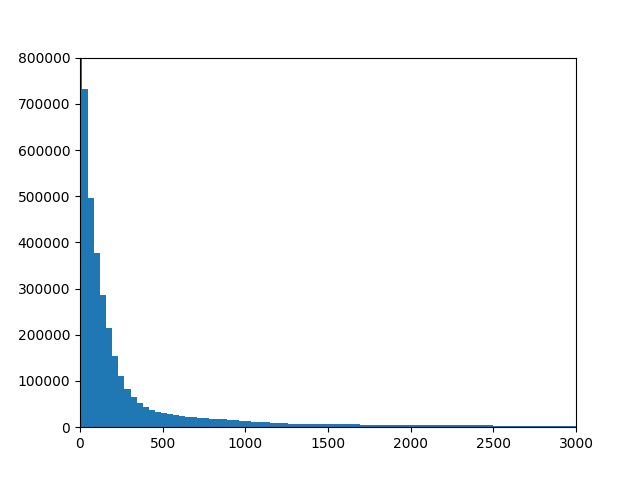

In [5]:
#reshape array from 3d to 2d
flattened_Array = np.ndarray.flatten(SubArray)
#plot a histogram
plt.figure()
plt.hist(flattened_Array, bins=800)
plt.ylim(top=0.8e6)
plt.xlim(left = 0, right=3000)
plt.show()

In [6]:
plt.close()

# Plot data for visualisation

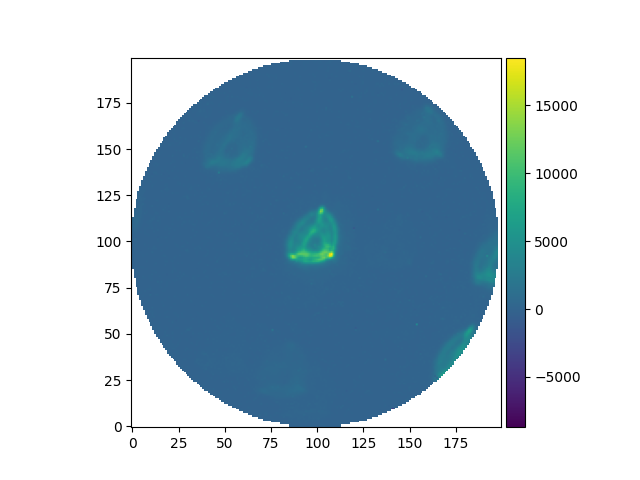

In [7]:
#plt.figure()
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.imshow(SubArray[0,:,:])
fig.colorbar(im, cax=cax, orientation='vertical' )
ax.invert_yaxis()

'''
axslider = plt.axes([0.25, 0.01, 0.65, 0.03])
slider = Slider(axslider, 'Imagettes', 0, 224, valstep=1)

def update(val):
    array = cube_mask[val,:,:]
    ax.imshow(array)
    ax.invert_yaxis()
slider.on_changed(update)
'''
plt.show()

In [8]:
plt.close()

# Derotate image

## Plot derotation

In [ ]:
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.imshow(derotated_cube[0,:,:])
fig.colorbar(im, cax=cax, orientation='vertical' )
ax.invert_yaxis()


axslider = plt.axes([0.25, 0.01, 0.65, 0.03])
slider = Slider(axslider, 'Imagettes', 0, 20, valstep=1)

def update(val):
    array = derotated_cube[val,:,:]
    ax.imshow(array)
    ax.invert_yaxis()
slider.on_changed(update)

plt.show()